In [1]:
import pandas as pd

#load dataset
data = pd.read_csv('laptop_prices.csv')

#menampilkan beberapa baris pertama dataset
print(data.head())

   Processor_Speed_GHz  Price_USD
0                  1.0        300
1                  1.5        350
2                  2.0        400
3                  2.5        450
4                  3.0        500


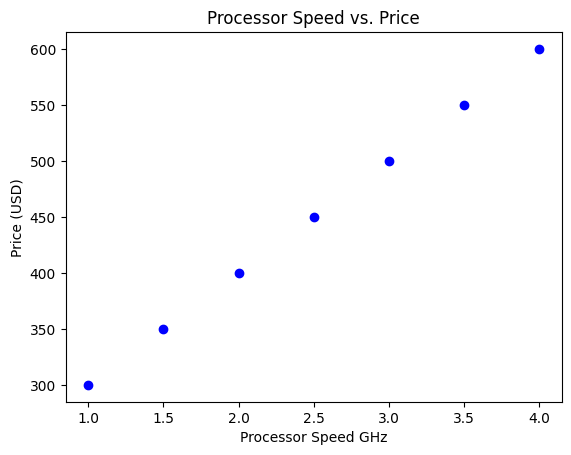

In [2]:
import matplotlib.pyplot as plt

#plot the data
plt.scatter(data['Processor_Speed_GHz'], data['Price_USD'], color='blue')
plt.xlabel('Processor Speed GHz')
plt.ylabel('Price (USD)')
plt.title('Processor Speed vs. Price')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Membagi data untuk training dan testing
X = data[['Processor_Speed_GHz']]
y = data[['Price_USD']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Membuat dan melatih model
model = LinearRegression()
model.fit(X_train, y_train)

# Membuat Prediksi
y_pred = model.predict(X_test)

# Menampilkan parameter model
print(f'Intercept: {model.intercept_}')
print(f'Coeffeicient: {model.coef_}')


Intercept: [200.]
Coeffeicient: [[100.]]


In [4]:
# Memprediksi harga untuk kecepatan processor baru
new_speeds = [[1.0], [2.0], [3.0], [4.0], [10.3]]
new_speeds_df = pd.DataFrame(new_speeds, columns=['Processor_Speed_GHz'])
predicted_prices = model.predict(new_speeds_df)

# Menampilkan hasil dari prediksi
for speed, price in zip(new_speeds, predicted_prices):
    print(f'Processor Speed: {speed[0]} GHz, Predicted Price: ${price.item():.2f}')

Processor Speed: 1.0 GHz, Predicted Price: $300.00
Processor Speed: 2.0 GHz, Predicted Price: $400.00
Processor Speed: 3.0 GHz, Predicted Price: $500.00
Processor Speed: 4.0 GHz, Predicted Price: $600.00
Processor Speed: 10.3 GHz, Predicted Price: $1230.00


In [5]:
from sklearn.metrics import mean_squared_error

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 0.00
